## Scrap Batch Prediction##

**Libraries used:-**
- numpy is the fundamental package for scientific computing with Python.
- matplotlib is a famous library to plot graphs in Python.
- Pandas is used to extract and work with the data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

Loading the data into the notebook

# Importing the dataset

In [6]:
import pandas as pd
import io
d1 = pd.read_csv("data/scrap_data.csv",encoding='cp437')
print(d1)

                    OPERATION_PRODUCT OPERATION_ID EMPLOYEE_ID MACHINE_CODE  \
0       F6A01513.BLANK_2_HOLES_PIERCE        O0089      E1036          PP04   
1                  F7182114.SPOT_WELD        O0068      E1051          SW01   
2                       FA974313.TRIM        O0072      E1036          PP02   
3          B0Y17741.BLANK_HOLE_PIERCE        O0095      E1032          PP02   
4                       FA974313.FORM        O0041      E1037          PP03   
5                 9709090124.3RD_DRAW        O0004       E1046         HP04   
6          B0Y17736.BLANK_HOLE_PIERCE        O0095      E1032          PP02   
7           9259076592.ROBOT_CO2_WELD        O0060      E1024          ROW2   
8           9259076592.ROBOT_CO2_WELD        O0060      E1011          ROW2   
9                     100260710.DEBUR        O0026        E057         DB01   
10                   100261280.EMBOSS        O0030       E1011         PP13   
11      B0Y18702.BLANK_2_HOLES_PIERCE        O0089  

# Label Encoding the Categorical Columns

In [7]:
d1["OPERATION_PRODUCT"] = d1["OPERATION_PRODUCT"].astype('category')
d1["OPERATION_ID"] = d1["OPERATION_ID"].astype('category')
d1["EMPLOYEE_ID"] = d1["EMPLOYEE_ID"].astype('category')
d1["MACHINE_CODE"] = d1["MACHINE_CODE"].astype('category')
d1["SHIFT"] = d1["SHIFT"].astype('category')
d1["PM_EMPLOYEE_ID"] = d1["PM_EMPLOYEE_ID"].astype('category')
d1.dtypes

OPERATION_PRODUCT    category
OPERATION_ID         category
EMPLOYEE_ID          category
MACHINE_CODE         category
SHIFT                category
HOUR                    int64
OT_FLAG                 int64
PLANED_QUANTITY         int64
PM_EMPLOYEE_ID       category
IS_SCRAP                int64
dtype: object

In [8]:
d1["OPERATION_PRODUCT"] = d1["OPERATION_PRODUCT"].cat.codes
d1["OPERATION_ID"] = d1["OPERATION_ID"].cat.codes
d1["EMPLOYEE_ID"] = d1["EMPLOYEE_ID"].cat.codes
d1["MACHINE_CODE"] = d1["MACHINE_CODE"].cat.codes
d1["SHIFT"] = d1["SHIFT"].cat.codes
d1["PM_EMPLOYEE_ID"] = d1["PM_EMPLOYEE_ID"].cat.codes
print(d1)

      OPERATION_PRODUCT  OPERATION_ID  EMPLOYEE_ID  MACHINE_CODE  SHIFT  HOUR  \
0                   297            44           31            17      0     2   
1                   309            32           43            30      0     1   
2                   327            36           31            15      0     1   
3                   153            49           26            15      0     2   
4                   326            21           33            16      0     1   
5                   119             3           36             4      0     1   
6                   149            49           26            15      0     1   
7                   100            28           15            28      0     3   
8                   100            28           11            28      0     6   
9                    12            16            5             1      0     2   
10                   31            17           10            26      0     5   
11                  163     

In [9]:
t = np.zeros((1236,10))
t[:] = d1[:]

#t=np.delete(t,[0],axis=1)
print(t)

[[297.  44.  31. ... 590.   5.   1.]
 [309.  32.  43. ... 989.   6.   1.]
 [327.  36.  31. ... 629.   5.   1.]
 ...
 [ 44.   1.   2. ... 150.   5.   0.]
 [241.  77.  30. ...  10.   1.   0.]
 [239.  70.  30. ...  10.   1.   0.]]


In [0]:
permutation1 = list(np.random.permutation(1236))
t2= t[permutation1,:]

Splitting the data into required datasets

In [0]:

split = 150
df = t2[:split,:]
dt = t2[split:,:]

In [12]:
train = np.zeros((1086,10))
train[:] = dt[:]
print(train)

[[4.40e+01 1.00e+00 2.00e+00 ... 1.50e+02 5.00e+00 0.00e+00]
 [2.92e+02 7.00e+01 2.50e+01 ... 3.40e+02 5.00e+00 1.00e+00]
 [1.00e+02 2.80e+01 1.40e+01 ... 5.00e+02 0.00e+00 1.00e+00]
 ...
 [2.80e+01 7.00e+00 1.00e+01 ... 2.30e+02 0.00e+00 1.00e+00]
 [4.20e+01 1.50e+01 4.90e+01 ... 1.68e+03 0.00e+00 0.00e+00]
 [9.40e+01 1.00e+00 5.00e+00 ... 2.06e+02 0.00e+00 0.00e+00]]


In [13]:
test = np.zeros((150,10))
test[:] = df[:]
print(test)

[[ 97.  23.  46. ... 240.   0.   0.]
 [ 93.  36.  10. ... 668.   0.   0.]
 [ 30.  13.  49. ... 196.   0.   0.]
 ...
 [101.  34.  10. ... 329.   0.   0.]
 [199.  55.  30. ... 583.   5.   0.]
 [ 31.  17.  10. ... 200.   5.   1.]]


In [14]:
print("test"+ str(df.shape))

test(150, 10)


In [15]:
Y_test = np.zeros((150,1))

Y_test[:] = test[:,[9]]
print(Y_test)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [16]:
Y_train = np.zeros((1086,1))

Y_train[:] = train[:,[9]]
print(Y_train)

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]


In [0]:
X_test = np.zeros((150,9))
X_train = np.zeros((1086,9))

X_test = np.delete(test,9,axis=1)
X_train = np.delete(train,9,axis=1)


In [18]:
print(X_test)
print("test:"+ str(X_test.shape))
print(X_train)
print("Train:"+ str(X_train.shape))

[[ 97.  23.  46. ...   0. 240.   0.]
 [ 93.  36.  10. ...   0. 668.   0.]
 [ 30.  13.  49. ...   0. 196.   0.]
 ...
 [101.  34.  10. ...   0. 329.   0.]
 [199.  55.  30. ...   0. 583.   5.]
 [ 31.  17.  10. ...   0. 200.   5.]]
test:(150, 9)
[[4.40e+01 1.00e+00 2.00e+00 ... 0.00e+00 1.50e+02 5.00e+00]
 [2.92e+02 7.00e+01 2.50e+01 ... 0.00e+00 3.40e+02 5.00e+00]
 [1.00e+02 2.80e+01 1.40e+01 ... 0.00e+00 5.00e+02 0.00e+00]
 ...
 [2.80e+01 7.00e+00 1.00e+01 ... 0.00e+00 2.30e+02 0.00e+00]
 [4.20e+01 1.50e+01 4.90e+01 ... 0.00e+00 1.68e+03 0.00e+00]
 [9.40e+01 1.00e+00 5.00e+00 ... 0.00e+00 2.06e+02 0.00e+00]]
Train:(1086, 9)


In [0]:
X_train_final = np.zeros((9,1086))
X_test_final = np.zeros((9,150))
Y_train_final = np.zeros((1,1086))
Y_test_final = np.zeros((1,150))

X_train_final = np.transpose(X_train)
X_test_final = np.transpose(X_test)
Y_train_final = np.transpose(Y_train)
Y_test_final = np.transpose(Y_test)

In [20]:
print(X_train_final[:][:])

[[4.40e+01 2.92e+02 1.00e+02 ... 2.80e+01 4.20e+01 9.40e+01]
 [1.00e+00 7.00e+01 2.80e+01 ... 7.00e+00 1.50e+01 1.00e+00]
 [2.00e+00 2.50e+01 1.40e+01 ... 1.00e+01 4.90e+01 5.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.50e+02 3.40e+02 5.00e+02 ... 2.30e+02 1.68e+03 2.06e+02]
 [5.00e+00 5.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]


**normalising the input data**

In [21]:
mtr = X_train_final.shape[1]
print(mtr)
utr = np.sum(X_train_final,axis=1,keepdims=True)/mtr
print(utr)

1086
[[1.20976059e+02]
 [2.36887661e+01]
 [2.02882136e+01]
 [1.66012891e+01]
 [6.90607735e-02]
 [2.48434622e+00]
 [6.44567219e-03]
 [5.95395028e+02]
 [2.27808471e+00]]


In [0]:
train_set_x = X_train_final - utr
test_set_x = X_test_final - utr

In [0]:
norm = (np.sum(np.square(train_set_x),axis=1,keepdims=True))/mtr

train_set_x = train_set_x / norm
test_set_x = test_set_x / norm

In [24]:
print(train_set_x)
print("train:"+ str(train_set_x.shape))
print(test_set_x)
print("Test:"+ str(test_set_x.shape))

[[-7.34547919e-03  1.63200457e-02 -2.00165099e-03 ... -8.87228725e-03
  -7.53633020e-03 -2.57420401e-03]
 [-6.22717876e-02  1.27106221e-01  1.18326505e-02 ... -4.58041347e-02
  -2.38472641e-02 -6.22717876e-02]
 [-9.40714349e-02  2.42366211e-02 -3.23454926e-02 ... -5.29208067e-02
   1.47688506e-01 -7.86399493e-02]
 ...
 [-1.00648749e+00 -1.00648749e+00 -1.00648749e+00 ... -1.00648749e+00
  -1.00648749e+00 -1.00648749e+00]
 [-9.55874505e-04 -5.48110285e-04 -2.04729890e-04 ... -7.84184308e-04
   2.32770053e-03 -8.35691367e-04]
 [ 4.83637286e-01  4.83637286e-01 -4.04776267e-01 ... -4.04776267e-01
  -4.04776267e-01 -4.04776267e-01]]
train:(9, 1086)
[[-2.28792750e-03 -2.66962951e-03 -8.68143624e-03 ... -1.90622548e-03
   7.44547387e-03 -8.58601074e-03]
 [-1.89039355e-03  3.37895211e-02 -2.93364817e-02 ...  2.83003035e-02
   8.59370887e-02 -1.83580465e-02]
 [ 1.32257020e-01 -5.29208067e-02  1.47688506e-01 ... -5.29208067e-02
   4.99557638e-02 -5.29208067e-02]
 ...
 [-1.00648749e+00 -1.0064874

# Activation Functions

**Defininhg Sigmoid activation function**

In [0]:
def sigmoid(z):
   
    s = 1 / (1 + np.exp(-z))
    
    return s

In [0]:
def sigmoiderivative(Z):
  
  f = Z * (1-Z)
  
  return f

**function for tanh activation**

In [0]:
def tanh(z):
    
    s = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    
    return s

**derivative of tanh activation**

In [0]:
def tanhderivative(x):
    
    p = 1 - np.square(x)
    
    return p

**function for RELU activation**

In [0]:
def relu(z):
    
    s = np.maximum(0,z)
    
    return s

**derivative of RELU activation**

In [0]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x


# Core functions

**Initialising the Weights and bais**

In [0]:

def initialize(layer):
    
    l = len(layer)
    parameters = {}
    np.random.seed(0)
    for i in range(1,l-1):
      parameters["W"+str(i)]=np.random.randn(layer[i],layer[i-1]) * np.sqrt(2/layer[i-1]) 
      parameters["b"+str(i)]=np.zeros((layer[i],1))
    
    parameters["W"+str(l-1)]=np.random.randn(layer[l-1],layer[l-2]) * 0.001
    parameters["b"+str(l-1)]=np.zeros((layer[l-1],1)) 
   
    
    return parameters

In [0]:
def initialize_adam(parameters,layer) :
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
   
    for l in range(L-1):
   
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    
    
    return v, s

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

**BACK PROPAGATION(Function to find the derivatives)**

In [0]:
def fwd_propagation(X,parameters,layer):
  
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
   
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

In [0]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

In [0]:
def back_prop(X,Y,forward,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],X.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
    
  return grads

**function to update the weights and Bais**

In [0]:
def optimise(parameters,grads,layer,learning_rate=0.01):
  l= len(layer)
  
  for i in range(1,l):
    parameters["W"+str(i)]=parameters["W"+str(i)] - (learning_rate * grads["dw"+str(i)])
    parameters["b"+str(i)]=parameters["b"+str(i)] - (learning_rate * grads["db"+str(i)])
  
  return parameters


In [0]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

**function to predict result**

In [0]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y1 = np.around(Y1)
  
  return Y1

In [0]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  
  return cost
  

**Final model with all functions merged**

In [0]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      forward = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 50 == 0:
      costs.append(cost)
    
    if j%100 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
      
  Y_prediction_train = predict(X_train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer)

  abb = np.mean(np.abs(Y_prediction_train - Y_train)) * 100
  abc = np.mean(np.abs(Y_prediction_test - Y_test)) * 100
  print("train accuracy: {} %".format(100 - abb))
  print("test accuracy: {} %".format(100 - abc))
  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

# Training of model

In [73]:
layer = [9,15,7,5,2,1]
keep_prob = [1.0,1.0,1.0,1.0,1.0,1.0]
para,grd,ford,cst,test,train1 = model(train_set_x, Y_train_final, test_set_x, Y_test_final, layer, keep_prob, mini_batch_size=512, beta1=0.9, beta2=0.99, learning_rate = 0.001, iterations = 900, lambd = 0.0 ) 

Cost after iteration 0: 0.693315
Cost after iteration 100: 0.693120
Cost after iteration 200: 0.689693
Cost after iteration 300: 0.682674
Cost after iteration 400: 0.656831
Cost after iteration 500: 0.638798
Cost after iteration 600: 0.654414
Cost after iteration 700: 0.645021
Cost after iteration 800: 0.664078
train accuracy: 65.19337016574585 %
test accuracy: 60.0 %


In [53]:
#for test set
#checking the number of false and true positives
exam = np.zeros((1,150))
exam1 = np.zeros((1,150))
exam2 = np.zeros((1,150))
exam3 = np.zeros((1,150))
exam = test - Y_test_final
exam1 = np.copy(exam)
exam2 = np.copy(exam)
exam1[exam1==-1]=0
exam[exam==1]=0

fp = np.sum(exam1)
fn = np.sum(exam)
fn = -1 * fn

exam2[exam2==-1]=1

corr = 150-np.sum(exam2)

exam3 = test * Y_test_final

tp = np.sum(exam3)
tn = corr-tp
print("for the Test Set")
print("false Positives="+ str(fp))
print("False Negatives="+ str(fn))
print("correct="+ str(corr))
print("True Positives="+ str(tp))
print("True Negatives="+ str(tn))


for the Test Set
false Positives=0.0
False Negatives=60.0
correct=90.0
True Positives=0.0
True Negatives=90.0


In [55]:
#for train set
#checking the number of false and true positives
examT = np.zeros((1,1086))
exam1T = np.zeros((1,1086))
exam2T = np.zeros((1,1086))
exam3T = np.zeros((1,1086))
examT = train1 - Y_train_final
exam1T = np.copy(examT)
exam2T = np.copy(examT)
exam1T[exam1T==-1]=0
examT[examT==1]=0

fp1 = np.sum(exam1T)
fn1 = np.sum(examT)
fn1 = -1 * fn1

exam2T[exam2T==-1]=1

corr1 = 1086-np.sum(exam2T)

exam3T = train1 * Y_train_final

tp1 = np.sum(exam3T)
tn1 = corr1-tp1
print("false positives="+ str(fp1))
print("false negatives="+ str(fn1))
print("correct="+ str(corr1))
print("true positives="+ str(tp1))
print("true negatives="+ str(tn1))

false positives=0.0
false negatives=378.0
correct=708.0
true positives=0.0
true negatives=708.0


**Graph for the reducing loss of the training set**

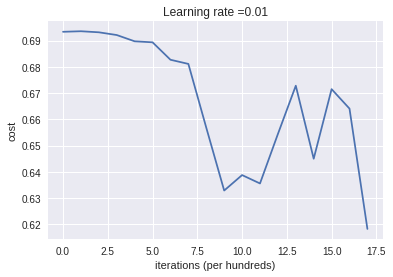

In [74]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01))
plt.show()

# END #